# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [22]:
import numpy as np
import keras
from keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Prepare the data

In [16]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [17]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [18]:
batch_size = 128
epochs = 15

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy", "Precision", "Recall"]
)

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - Precision: 0.8848 - Recall: 0.6362 - accuracy: 0.7594 - loss: 0.7714 - val_Precision: 0.9835 - val_Recall: 0.9735 - val_accuracy: 0.9785 - val_loss: 0.0841
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - Precision: 0.9691 - Recall: 0.9569 - accuracy: 0.9626 - loss: 0.1276 - val_Precision: 0.9883 - val_Recall: 0.9830 - val_accuracy: 0.9850 - val_loss: 0.0604
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Precision: 0.9776 - Recall: 0.9697 - accuracy: 0.9735 - loss: 0.0890 - val_Precision: 0.9896 - val_Recall: 0.9850 - val_accuracy: 0.9873 - val_loss: 0.0456
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Precision: 0.9803 - Recall: 0.9743 - accuracy: 0.9769 - loss: 0.0749 - val_Precision: 0.9881 - val_Recall: 0.9852 - val_accuracy: 0.9860 - val_loss: 0.0454
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Precision: 0.9821 - Recall: 0.9773 - accuracy: 0.9796 - loss: 0.0644 - val_Precision: 0.9901 - val_Recall:

## Evaluate the trained model

Test loss: 0.024126414209604263
Test accuracy: 0.9918000102043152
Test precision: 0.9924894571304321
Test recall: 0.991100013256073
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
 [[ 976    0    1    0    0    0    1    1    1    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   1    1 1019    0    1    0    0    7    3    0]
 [   0    0    2 1003    0    2    0    2    1    0]
 [   0    0    0    0  979    0    0    1    0    2]
 [   1    0    0    4    0  884    1    0    1    1]
 [   2    2    0    0    2    3  948    0    1    0]
 [   0    2    2    1    0    1    0 1020    1    1]
 [   1    0    1    1    1    1    0    2  965    2]
 [   1    0    0    0    8    5    0    4    1  990]]


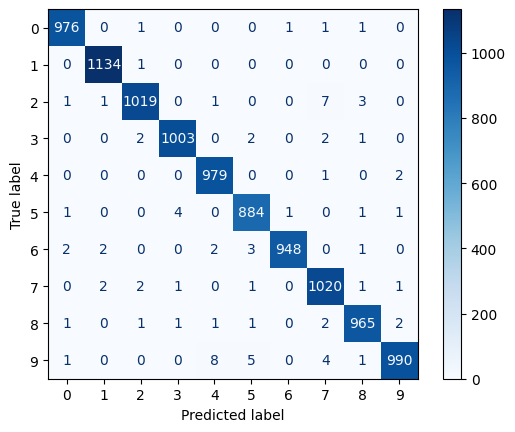

In [19]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print("Test precision:", score[2])
print("Test recall:", score[3])

# Generate confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = np.argmax(y_test, axis=1)          # Convert one-hot to class labels

cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(num_classes))
disp.plot(cmap="Blues")
plt.show()


In [26]:
# Crear el callback de EarlyStopping (detención temprana)
early_stopping = EarlyStopping(
    monitor='val_loss',  # Se puede usar 'val_accuracy' si prefieres monitorear la precisión
    patience=3,          # Número de épocas sin mejora para detener el entrenamiento
    restore_best_weights=True,  # Restablece los mejores pesos cuando se detiene el entrenamiento
)

# Crear el callback para guardar el mejor modelo durante el entrenamiento
model_checkpoint = ModelCheckpoint(
    'best_model.keras',        # Changed the file extension to .keras
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Agregar ambos callbacks al entrenar el modelo
callbacks = [early_stopping, model_checkpoint]

# Entrenamiento del modelo con los callbacks
model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    callbacks=callbacks  # Aquí se pasan los callbacks
)


Epoch 1/15
411/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.9925 - Recall: 0.9910 - accuracy: 0.9917 - loss: 0.0253
Epoch 1: val_loss improved from inf to 0.03007, saving model to best_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Precision: 0.9924 - Recall: 0.9910 - accuracy: 0.9916 - loss: 0.0254 - val_Precision: 0.9927 - val_Recall: 0.9918 - val_accuracy: 0.9923 - val_loss: 0.0301
Epoch 2/15
416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.9930 - Recall: 0.9919 - accuracy: 0.9923 - loss: 0.0229
Epoch 2: val_loss improved from 0.03007 to 0.02904, saving model to best_model.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Precision: 0.9930 - Recall: 0.9919 - accuracy: 0.9923 - loss: 0.0229 - val_Precision: 0.9933 - val_Recall: 0.9925 - val_accuracy: 0.9925 - val_loss: 0.0290
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.9931 - Recall: 0.9919 - accuracy: 0.9924 - loss: 0.0238
Epoch 3: val_loss improved from 0.02904 to 0.02675, saving model to